In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from os import makedirs
import pickle

In [2]:
df = pd.read_csv('df_kwh_adjusted.csv', sep=';', index_col=0)
df

# Notice:
# Every year in March time change day (which has only 23 hours) the values between 1:00 am and 2:00 am are zero for all points. 
# Every year in October time change day (which has 25 hours) the values between 1:00 am and 2:00 am aggregate the consumption of two hours.

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7075.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-31 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [4]:
df.isnull().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

In [5]:
df.isna().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

In [6]:
df.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.0,140256.0,140256.0,140256.000000,140256.000000,140256.000000,140256.0,140256.0,140256.0,140256.000000,...,140256.0,140256.000000,140256.000000,140256.000000,140256.0,140256.0,140256.0,140256.0,140256.000000,140256.000000
mean,0.0,0.0,0.0,0.026291,0.281984,0.813468,0.0,0.0,0.0,0.072902,...,0.0,9390.235177,2.110427,68.284958,0.0,0.0,0.0,0.0,0.446505,58.208918
std,0.0,0.0,0.0,1.281609,1.975930,6.413715,0.0,0.0,0.0,1.348057,...,0.0,9681.456909,43.179433,298.676252,0.0,0.0,0.0,0.0,9.740849,510.117704
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,6025.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,13700.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
max,0.0,0.0,0.0,62.500000,37.500000,125.000000,0.0,0.0,0.0,25.000000,...,0.0,48200.000000,1750.000000,2500.000000,0.0,0.0,0.0,0.0,312.500000,6600.000000


In [7]:
df.std(axis=0) # 計算 DataFrame df 中每個欄位的標準差。

MT_001      0.000000
MT_002      0.000000
MT_003      0.000000
MT_004      1.281609
MT_005      1.975930
             ...    
MT_366      0.000000
MT_367      0.000000
MT_368      0.000000
MT_369      9.740849
MT_370    510.117704
Length: 370, dtype: float64

<p> 取標準差較大的前幾個索引作為y預測目標及x訓練特徵 </p>
<ol>
    <p> 原因: 標準差大的欄位提供更多訊息來提升模型的泛化能力。 </p>
    <li>
        標準差越大的欄位通常代表其值的變異程度越高，即分布更分散。當我們希望預測某個目標變數（y）時，選擇標準差較大的變數有時可能表示該變數的變異性可以提供更多有意義的模式來建構模型。
    </li>
    <li>
        標準差較大的欄位代表變異性較高的特徵，模型對這樣的變異性進行學習，可能能夠捕捉到更複雜的關係，預測範圍也可能隨之增加，提高預測準確性。
    </li>
</ol>

In [8]:
selected_feature_idx = np.argsort(list(df.std(axis=0)))[::-1]
print('最大值索引:', df.std(axis=0).idxmax())
selected_feature_idx

最大值索引: MT_362


array([361, 195, 278, 369, 227, 363, 207, 350, 221, 146, 193, 219, 356,
       240, 338,  42, 222, 322, 327, 223, 297,  98,  63, 160, 362, 162,
        48, 268, 275, 344, 190, 208, 102, 165, 306, 313, 203, 156, 215,
       210, 234,  85, 206, 204, 254, 230, 103, 199, 202, 217, 218, 316,
       237, 209, 340, 359, 309, 212, 154, 228, 130, 253, 100, 293, 151,
       368,  87,  97, 198, 214, 101, 357, 201, 354, 279, 188, 267, 289,
       323, 308, 245,   5, 330, 213, 189,  83, 294, 224, 244, 296, 315,
        68, 113, 216, 243, 135,  64, 324, 342,  96, 290, 197,  11, 185,
       127, 326, 355, 345, 335,  40, 118, 246, 339, 328, 196, 248, 229,
       311, 251, 332, 232, 104, 174,  30,   4, 325, 348,  39, 283,  89,
       181, 178, 307, 256,   9, 299,   3, 276, 211,  24,  75, 272, 298,
       329,  92, 158,  76, 305, 231, 301, 260, 352, 343, 281,  88, 117,
       110, 259,  25, 257, 107,  80, 180, 173, 274, 239,  95, 183,  84,
        10,  82,  86,  32,  51,  38,  90, 108, 116, 115, 114,  3

In [9]:
df[df.columns.tolist()]=MinMaxScaler().fit_transform(df[df.columns.tolist()])
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.146266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-31 23:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.146784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-31 23:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.144191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-31 23:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.145228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y = df.iloc[:,selected_feature_idx[0]].values # 取標準差最大的索引作為y預測目標
print(y.shape)
pd.DataFrame(y) 
# 

(140256,)


,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
140251,0.146266
140252,0.146784
140253,0.144191
140254,0.145228


In [11]:
X = df.iloc[:,selected_feature_idx[1:11]].values # 取標準差次大的[1:11]索引作為X訓練特徵
print(X.shape)
pd.DataFrame(X)

(140256, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.221557,0.0,0.0
1,0.000000,0.524611,0.0,0.0,0.0,0.0,0.000000,0.187625,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.203593,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.213573,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
140251,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
140252,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
140253,0.000000,0.419890,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
140254,0.121795,0.000000,0.0,0.0,0.0,0.0,0.115108,0.000000,0.0,0.0


In [12]:
data_dic = {'X_train':X[:int(X.shape[0]*0.8)],
            'y_train':y[:int(X.shape[0]*0.8)],
            'X_test':X[int(y.shape[0]*0.8):],
            'y_test':y[int(y.shape[0]*0.8):]}
data_dic

{'X_train': array([[0.        , 0.        , 0.        , ..., 0.22155689, 0.        ,
         0.        ],
        [0.        , 0.52461075, 0.        , ..., 0.18762475, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.20359281, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.48303393, 0.        ,
         0.        ],
        [0.        , 0.        , 0.75757576, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 'y_train': array([0.        , 0.        , 0.        , ..., 0.20643154, 0.24896266,
        0.28475104]),
 'X_test': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.49700599, 0.        ,
         0.     

In [13]:
for key,value in data_dic.items():
    with open(f'{key}.pkl','wb') as f:
        pickle.dump(value, f)

In [14]:
makedirs('feature', exist_ok=True)

In [15]:
def plot_outlier(ts, n_column, ewm_span=100, threshold=3.0):
    assert type(ts) == pd.Series
    fig, ax = plt.subplots(figsize=(15,5))
    ewm_mean = ts.ewm(span=ewm_span).mean()  
    ewm_std = ts.ewm(span=ewm_span).std()  
    ax.plot(ts, label='original')
    ax.plot(ewm_mean, label='ewma')

    # plot data which deviate from range during mean ±  3 * std as outlier 
    ax.fill_between(ts.index,
                    ewm_mean - ewm_std * threshold,
                    ewm_mean + ewm_std * threshold,
                    alpha=0.2)
    outlier = ts[(ts - ewm_mean).abs() > ewm_std * threshold]
    ax.scatter(outlier.index, outlier, label='outlier')
    ax.legend()
    plt.title(n_column)
    plt.savefig(f'feature/{n_column}.png')

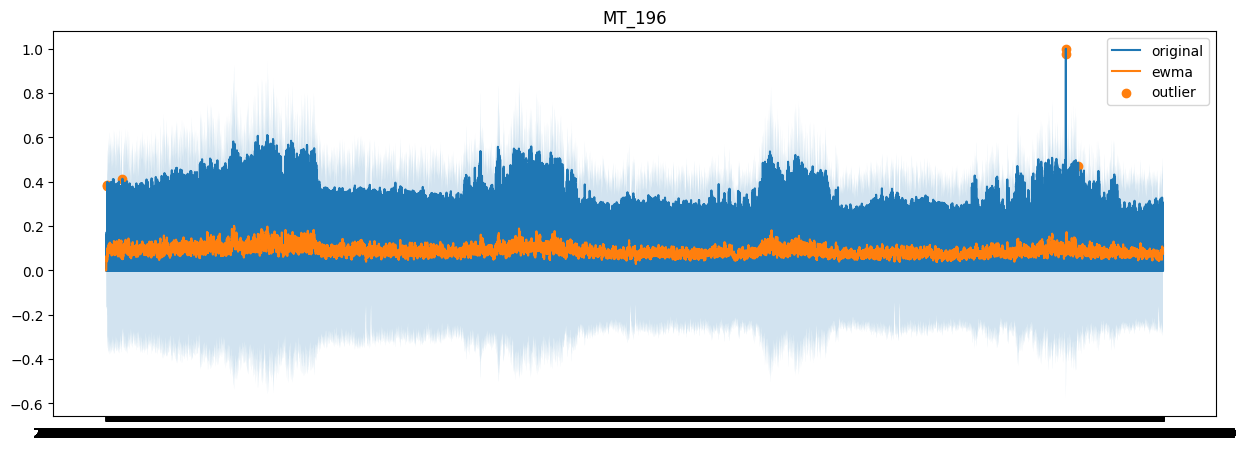

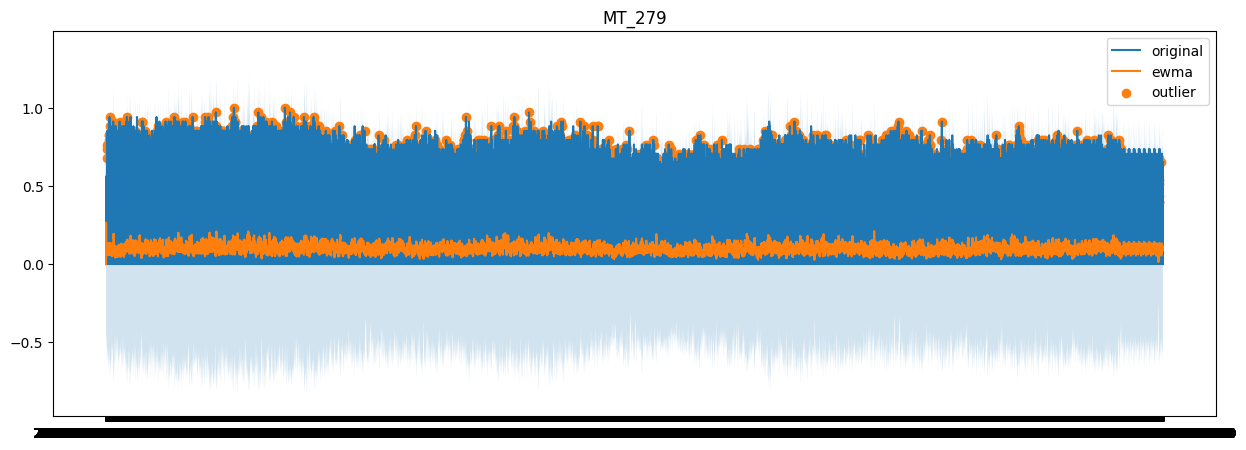

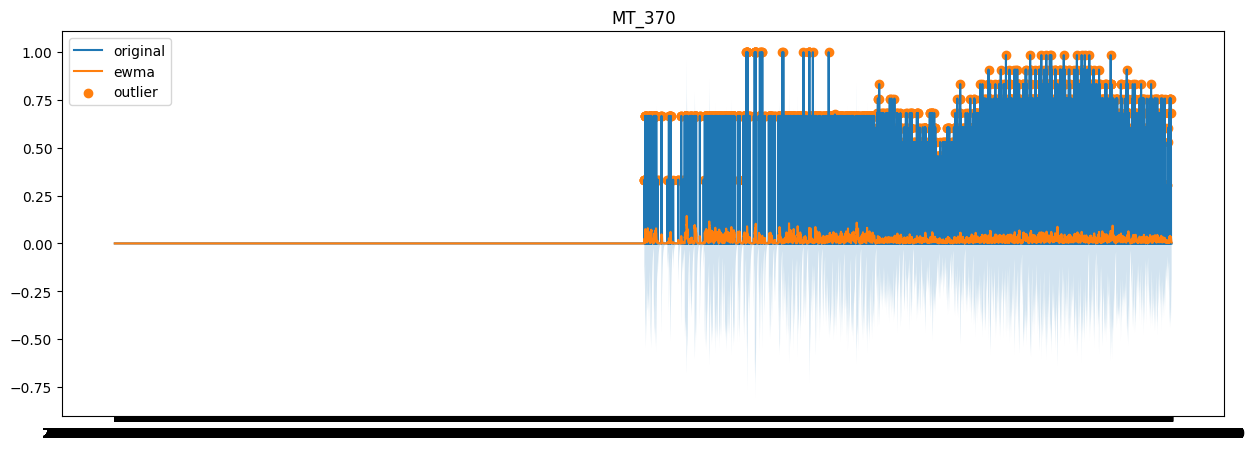

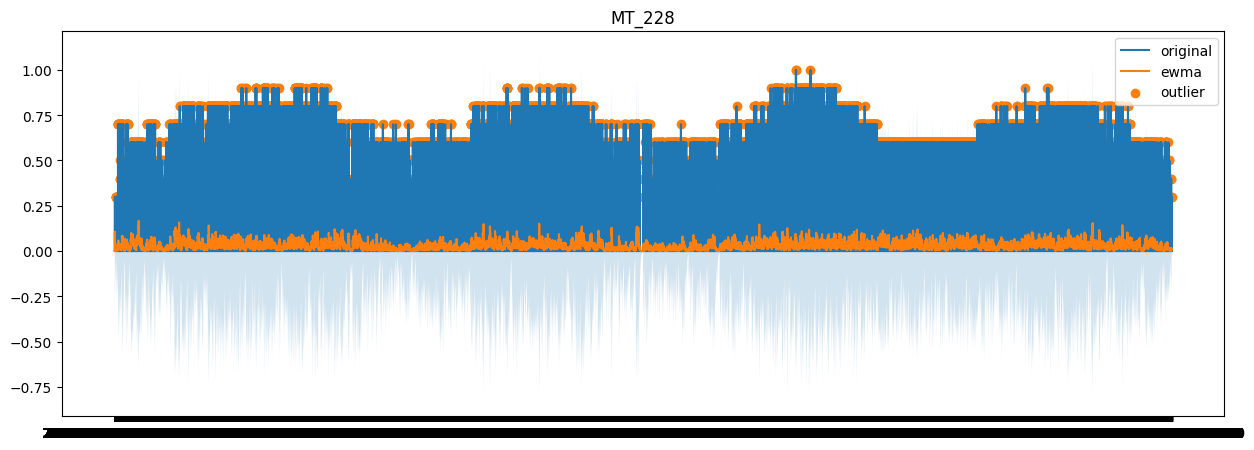

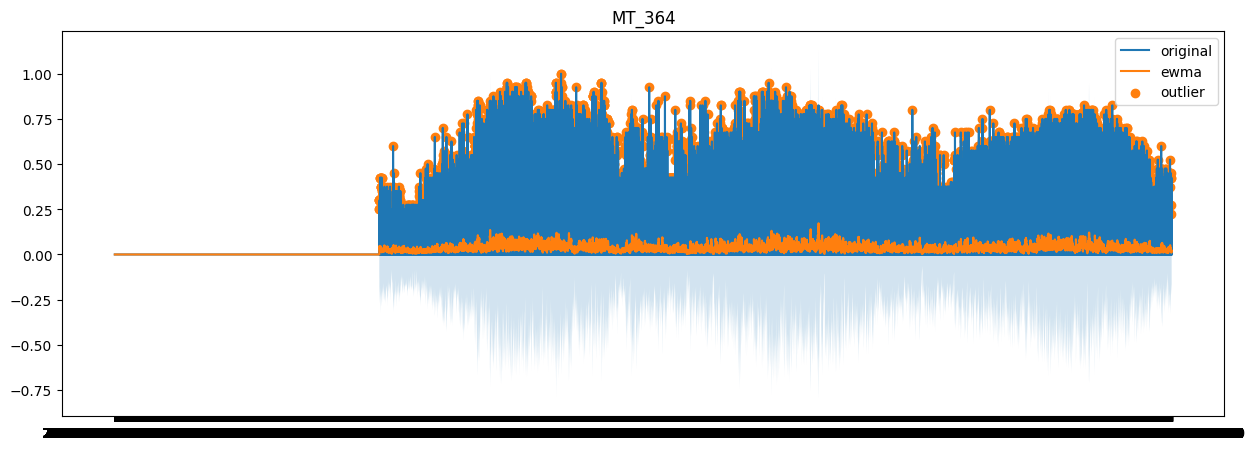

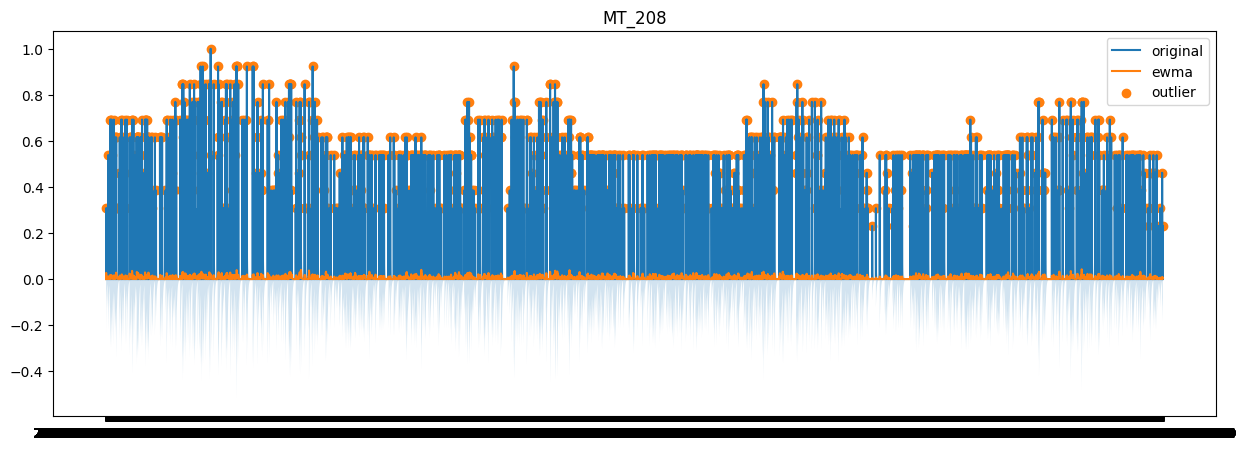

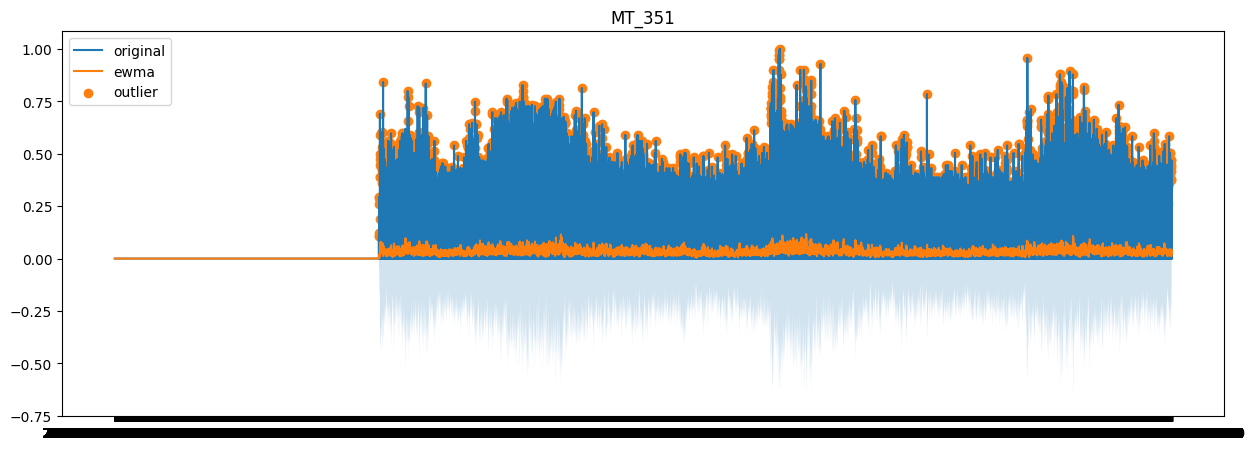

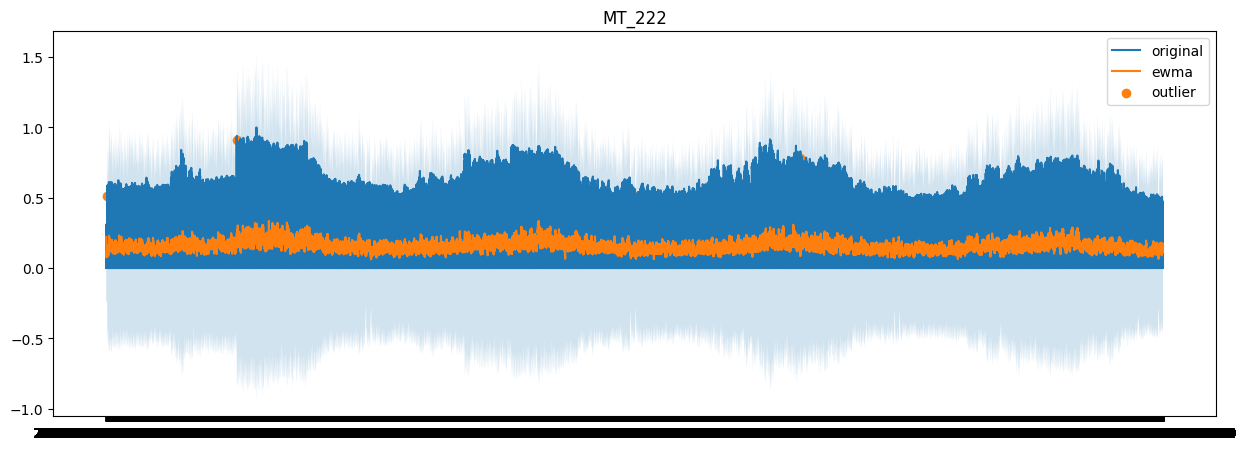

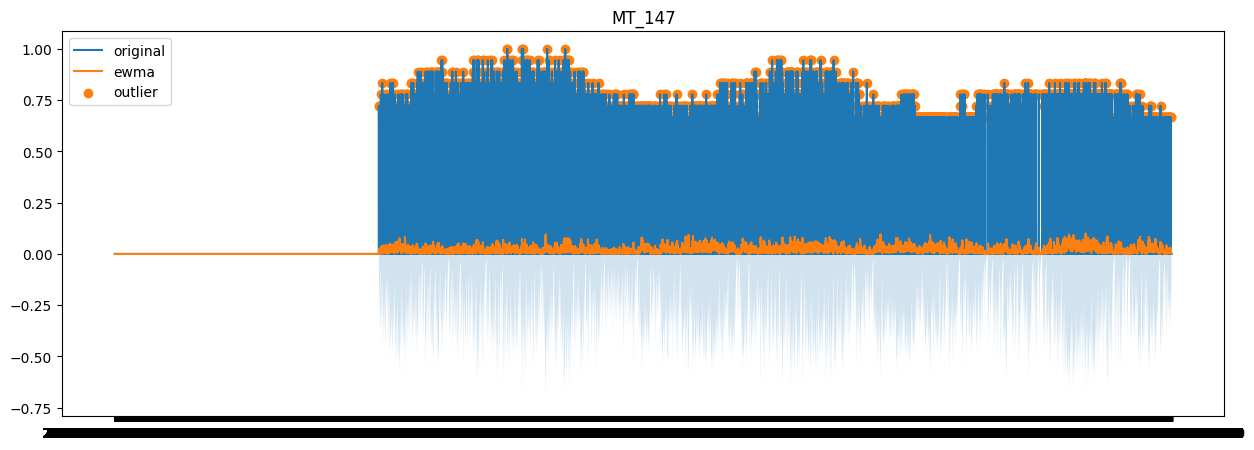

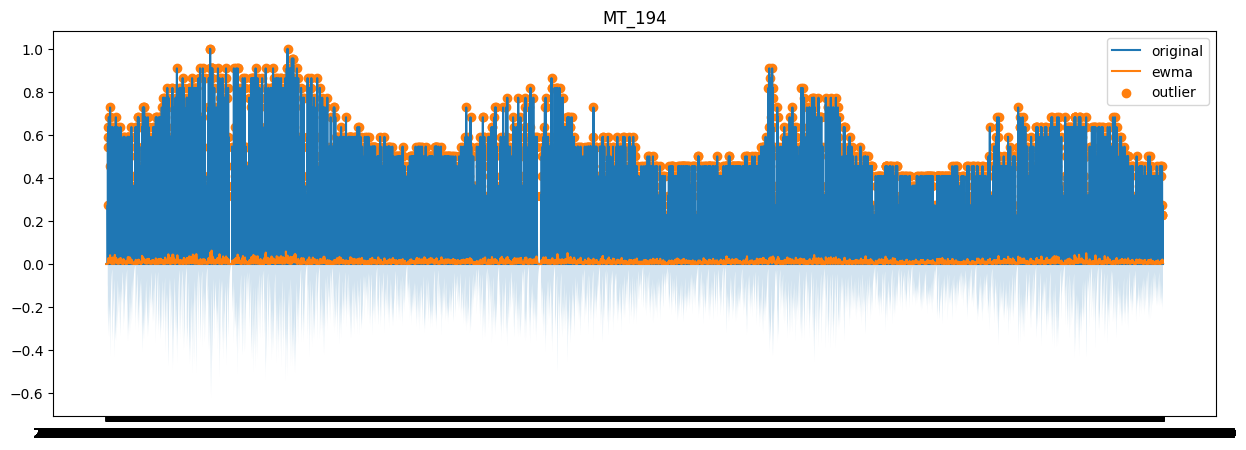

In [16]:
# save feature plot 
for n_column in df.iloc[:,selected_feature_idx[1:11]]:
    plot_outlier(df.iloc[:,selected_feature_idx[1:11]][n_column],n_column)

<p>
    Reference: energy-model
    <br>
    https://www.kaggle.com/code/eduardojst10/energy-model
    <br>
    https://www.kaggle.com/datasets/eduardojst10/electricityloaddiagrams20112014/data
</p>